In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airport-information/airport_frequencies.csv
/kaggle/input/airport-information/airport_code.csv
/kaggle/input/airport-codes/airports.csv
/kaggle/input/comprehensive-flight-data-from-priceline/flight.csv


In [2]:
#Reading the dataset

path = '/kaggle/input/comprehensive-flight-data-from-priceline/flight.csv'

flight = pd.read_csv( path, index_col=0)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (4,11,12,36,37,38,39,40,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,86,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,108,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,130,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,152,154,155,156,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,174,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,218,220,221,222,224,225,227,228,229,230,231,232,233,234,235,236,237,238,240,242,243,244,246,247,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,284,286,287,288,289,290,291,293,294,295,296,297,298,2

## Pre-Processing & Cleaning the data

In [3]:
#Checking all null columns
flight.isna().sum()


Travel  Time               0
Unnamed: 2              2461
Number of  Stoppage        0
Ticket prize(Doller)       3
Depreture  Airport       297
                        ... 
Unnamed: 490            2461
Unnamed: 491            2460
Unnamed: 492            2460
Unnamed: 493            2460
Unnamed: 494            2460
Length: 494, dtype: int64

In [4]:
#Removing all unnamed columns

#storing columns that have unnamed as column name
unnamed_cols = flight.columns.str.contains('Unnamed')

#drop all columns where the value is true
flight_cleaned = flight.drop(flight[flight.columns[unnamed_cols]], axis=1)

flight_cleaned.head()

,Travel Time,Number of Stoppage,Ticket prize(Doller),Depreture Airport,Depreture Time,1st Stoppage Waiting Hour,1st Stoppage,2nd StoppageWaiting Time,2nd Stoppage,3rd Stoppage Waiting time,3rd Stoppage,Destination Airport,Arrival Time,Arrival Date
Airline name,,,,,,,,,,,,,,
Emirates,51h 15m,2 Stops,1156,DAC,01:40a,11h 15m,DXB,19h 40m,MXP,NaN,NaN,JFK,06:55p,Apr 8
Emirates,57h 25m,2 Stops,1156,DAC,07:30p,17h 15m,DXB,19h 40m,MXP,NaN,NaN,JFK,06:55p,Apr 9
Turkish,26h 5m,1 Stop,1175,DAC,06:35a,6h 20m,IST,NaN,NaN,NaN,NaN,EWR,10:40p,NaN
Kuwait,21h 15m,1 Stop,1264,DAC,03:10a,2h 10m,KWI,NaN,NaN,NaN,NaN,JFK,02:25p,NaN
Etihad,22h 35m,1 Stop,1283,DAC,08:55p,3h 0m,AUH,NaN,NaN,NaN,NaN,JFK,09:30a,Apr 8


In [5]:
#Checking all nulls from the filtered columns
flight_cleaned.isna().sum()

Travel  Time                    0
Number of  Stoppage             0
Ticket prize(Doller)            3
Depreture  Airport            297
Depreture Time                  1
1st Stoppage Waiting Hour      59
1st Stoppage                   60
2nd StoppageWaiting Time     1806
2nd Stoppage                 1805
3rd Stoppage Waiting time    2444
3rd Stoppage                 2444
Destination Airport           294
Arrival Time                   10
Arrival Date                  151
dtype: int64

In [6]:
#Checking rows with nan for ticket prize

flight_cleaned[ flight_cleaned ['Ticket prize(Doller)'].isna() ]

,Travel Time,Number of Stoppage,Ticket prize(Doller),Depreture Airport,Depreture Time,1st Stoppage Waiting Hour,1st Stoppage,2nd StoppageWaiting Time,2nd Stoppage,3rd Stoppage Waiting time,3rd Stoppage,Destination Airport,Arrival Time,Arrival Date
Airline name,,,,,,,,,,,,,,
Multiple,20h 35m,1 Stop,NaN,JFK,06:30p,6h 25m,LHR,NaN,NaN,NaN,NaN,DXB,07:45p,Apr 8
Multiple,21h 0m,1 Stop,NaN,EWR,06:05p,6h 40m,LHR,NaN,NaN,NaN,NaN,DXB,07:45p,Apr 8
Multiple,21h 1m,1 Stop,NaN,JFK,06:04p,6h 35m,LHR,NaN,NaN,NaN,NaN,DXB,07:45p,Apr 8


In [7]:
#Checking rows with NaN for Depreture  Airport 

flight_cleaned[ flight_cleaned ['Depreture  Airport'].isna() ]

,Travel Time,Number of Stoppage,Ticket prize(Doller),Depreture Airport,Depreture Time,1st Stoppage Waiting Hour,1st Stoppage,2nd StoppageWaiting Time,2nd Stoppage,3rd Stoppage Waiting time,3rd Stoppage,Destination Airport,Arrival Time,Arrival Date
Airline name,,,,,,,,,,,,,,
Turkish,32h 55m,1 Stop,717,NaN,07:30p,13h 25m,JFK,NaN,NaN,NaN,NaN,IST,03:25p,Apr 9
American,39h 5m,2 Stops,840,NaN,05:00p,1h 24m,EWR,14h 25m,DOH,NaN,NaN,ORD,07:05p,Apr 9
American,31h 15m,2 Stops,865,NaN,06:55p,57m,LGA,4h 10m,DOH,NaN,NaN,DFW,01:10p,Apr 9
Turkish,39h 35m,1 Stop,914,NaN,12:50p,20h 5m,JFK,NaN,NaN,NaN,NaN,IST,03:25p,Apr 9
Air India,20h 5m,1 Stop,935,NaN,12:30p,2h 10m,JFK,NaN,NaN,NaN,NaN,DEL,07:35p,Apr 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lufthansa,17h 25m,2 Stops,1572,NaN,02:50a,1h 55m,FRA,NaN,NaN,NaN,NaN,LHR,03:45p,Apr 8
Lufthansa,20h 5m,2 Stops,1572,NaN,02:50a,3h 55m,FRA,NaN,NaN,NaN,NaN,LHR,06:25p,Apr 8
Singapore,20h 30m,1 Stop,1607,NaN,11:40p,1h 20m,SIN,NaN,NaN,NaN,NaN,LHR,03:40p,Apr 8


In [8]:
#Fetching all column names

flight_cleaned.columns 

Index(['Travel  Time', 'Number of  Stoppage ', 'Ticket prize(Doller)',
       'Depreture  Airport', 'Depreture Time', '1st Stoppage Waiting Hour',
       '1st Stoppage', '2nd StoppageWaiting Time', '2nd Stoppage',
       '3rd Stoppage Waiting time', '3rd Stoppage', 'Destination Airport',
       'Arrival Time', 'Arrival Date'],
      dtype='object')

In [9]:
#renaming columns
flight_cleaned.rename( columns = 
                     {'Travel  Time' :'Flight Duration', 
                      'Number of  Stoppage ' : 'Layover', 
                      'Ticket prize(Doller)' : 'Price', 
                      'Depreture  Airport' :'Airport Dep',
                     'Depreture Time' : 'Time Dep',
                     '1st Stoppage Waiting Hour' : '1st Layover duration',
                     '1st Stoppage' : '1st Layover Airport',
                     '2nd StoppageWaiting Time': '2nd layoff duration',
                     '2nd Stoppage': '2nd layover Airport',
                     '3rd Stoppage Waiting time': '3rd layover duration',
                     '3rd Stoppage' : '3rd layover airport',
                     'Destination Airport': 'Airport dest',
                     'Arrival Time': 'Time Arr',
                     'Arrival Date': 'Date Arr'}, inplace=True)
flight_cleaned

,Flight Duration,Layover,Price,Airport Dep,Time Dep,1st Layover duration,1st Layover Airport,2nd layoff duration,2nd layover Airport,3rd layover duration,3rd layover airport,Airport dest,Time Arr,Date Arr
Airline name,,,,,,,,,,,,,,
Emirates,51h 15m,2 Stops,1156,DAC,01:40a,11h 15m,DXB,19h 40m,MXP,NaN,NaN,JFK,06:55p,Apr 8
Emirates,57h 25m,2 Stops,1156,DAC,07:30p,17h 15m,DXB,19h 40m,MXP,NaN,NaN,JFK,06:55p,Apr 9
Turkish,26h 5m,1 Stop,1175,DAC,06:35a,6h 20m,IST,NaN,NaN,NaN,NaN,EWR,10:40p,NaN
Kuwait,21h 15m,1 Stop,1264,DAC,03:10a,2h 10m,KWI,NaN,NaN,NaN,NaN,JFK,02:25p,NaN
Etihad,22h 35m,1 Stop,1283,DAC,08:55p,3h 0m,AUH,NaN,NaN,NaN,NaN,JFK,09:30a,Apr 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
British,47h 35m,2 Stops,2654,DAC,10:50a,11h 35m,DOH,NaN,NaN,NaN,NaN,DXB,08:25a,Apr 9
Multiple,19h 15m,2 Stops,3307,DAC,12:50a,1h 50m,CAN,NaN,NaN,NaN,NaN,DXB,06:05p,NaN
Multiple,23h 30m,2 Stops,3606,DAC,12:50a,4h 0m,CAN,NaN,NaN,NaN,NaN,DXB,10:20p,NaN


In [10]:
#Converting duration to minutes / hours
import re

#Function to convert flight duration in statemen to minutes
def duration_minutes(duration):
    
    if not pd.isna(duration) : 
        #print(duration)
        #split the duration to get hour and minute
        travel_duration = duration.split()

        #removing all characters to extract the hour and minute numerals
        travel_duration = [ re.sub("[^0-9]", "0",value) for value in travel_duration ] #Setting 0 instead of null (hour or minute cannot be null can be 0)

        #Converting the values to int to caluclate total hours
        travel_duration = list(map(int, travel_duration))

        #Convert hour to minute and sum the total
        #print(travel_duration)
        if len(travel_duration) <= 1:
            total_duration = travel_duration[0] * 60 
        else :
            total_duration = travel_duration[0] * 60 + travel_duration[1]

        return total_duration
    
    else :
        return 0

#Testing
#duration_minutes("51h 15m")


In [11]:
from datetime import datetime

#function to convert time in statement to timestamp

def time_convert(time) : 
    
    #print(time)
    if not pd.isna(time) : # Checking for NaN values
        
        #extracting character to find am or pm
        time_day = re.findall("[a|p]", time)

        #removing the hour indicator a|p
        time_stamp = re.sub("[a|p]", "", time)

        #seperating hour and minute
        timestamp = time_stamp.split(':')

        #print(time_day, int(timestamp[0]) )

        if len(timestamp) > 1 :
            #print(timestamp)
            #cheching is its pm and time of day is not past 12
            if time_day[0] == 'p' and int( timestamp[0] ) < 12 :

                #Converting to 24hour time
                hour = int(timestamp[0] ) 
                hour = hour + 12

                #assinging the value
                timestamp[0] = str(hour)

            #checking if its 12 am morning 
            elif time_day[0] == 'a' and int( timestamp[0] ) == 12:
                #print("inhere")

                timestamp[0] = "00"

            #print(":".join(timestamp))

            return ":".join(timestamp)
    else :
        return "24:00"
    
#Test
#time_convert("12:55a")

In [12]:
#Converting duration from string to int

flight_cleaned['Flight_Duration_time'] = flight_cleaned['Flight Duration'].apply(duration_minutes)

flight_cleaned['First_layover_duration'] = flight_cleaned['1st Layover duration'].apply(duration_minutes)

flight_cleaned['Second_layover_duration'] = flight_cleaned['2nd layoff duration'].apply(duration_minutes)

flight_cleaned['Third_layover_duration'] = flight_cleaned['3rd layover duration'].apply(duration_minutes)


In [13]:
#Converting time from string to datetime

flight_cleaned['Departure_time'] = flight_cleaned['Time Dep'].apply(time_convert)

flight_cleaned['Arrival_time'] = flight_cleaned['Time Arr'].apply(time_convert)

In [14]:
#Arrival date - string to date time

flight_cleaned['Arr_Month'] = pd.to_datetime( flight_cleaned['Date Arr'].str.strip().str.slice( start = -6), format = '%b%d' , errors= 'coerce').dt.month_name()

flight_cleaned['Arr_Day'] = pd.to_datetime( flight_cleaned['Date Arr'].str.strip().str.slice( start = -6), format = '%b%d' , errors= 'coerce').dt.day

In [15]:
flight_cleaned

,Flight Duration,Layover,Price,Airport Dep,Time Dep,1st Layover duration,1st Layover Airport,2nd layoff duration,2nd layover Airport,3rd layover duration,...,Time Arr,Date Arr,Flight_Duration_time,First_layover_duration,Second_layover_duration,Third_layover_duration,Departure_time,Arrival_time,Arr_Month,Arr_Day
Airline name,,,,,,,,,,,,,,,,,,,,,
Emirates,51h 15m,2 Stops,1156,DAC,01:40a,11h 15m,DXB,19h 40m,MXP,NaN,...,06:55p,Apr 8,30750,6750,11800,0,01:40,18:55,April,8.0
Emirates,57h 25m,2 Stops,1156,DAC,07:30p,17h 15m,DXB,19h 40m,MXP,NaN,...,06:55p,Apr 9,34450,10350,11800,0,19:30,18:55,April,9.0
Turkish,26h 5m,1 Stop,1175,DAC,06:35a,6h 20m,IST,NaN,NaN,NaN,...,10:40p,NaN,15650,3800,0,0,06:35,22:40,NaN,NaN
Kuwait,21h 15m,1 Stop,1264,DAC,03:10a,2h 10m,KWI,NaN,NaN,NaN,...,02:25p,NaN,12750,1300,0,0,03:10,14:25,NaN,NaN
Etihad,22h 35m,1 Stop,1283,DAC,08:55p,3h 0m,AUH,NaN,NaN,NaN,...,09:30a,Apr 8,13550,1800,0,0,20:55,09:30,April,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
British,47h 35m,2 Stops,2654,DAC,10:50a,11h 35m,DOH,NaN,NaN,NaN,...,08:25a,Apr 9,28550,6950,0,0,10:50,08:25,April,9.0
Multiple,19h 15m,2 Stops,3307,DAC,12:50a,1h 50m,CAN,NaN,NaN,NaN,...,06:05p,NaN,11550,1100,0,0,00:50,18:05,NaN,NaN
Multiple,23h 30m,2 Stops,3606,DAC,12:50a,4h 0m,CAN,NaN,NaN,NaN,...,10:20p,NaN,14100,2400,0,0,00:50,22:20,NaN,NaN


## Explonatory Analysis

In [16]:
#Moving Airline name to column
flight_cleaned.reset_index(inplace= True)

## What is the most prefered airline ? 

In [17]:
#Finding total booking for airlines
#flight_cleaned.columns

flight_booking = flight_cleaned.groupby('Airline name ',as_index= False)\
.agg(Total_Flights = ('Airline name ', 'count'))\
.sort_values('Total_Flights' , ascending= False)\
.reset_index(drop = True)

flight_booking

,Airline name,Total_Flights
0,Multiple,546
1,Emirates,202
2,Qatar,202
3,British,177
4,United,160
5,American,123
6,IndiGo,103
7,Turkish,95
8,Lufthansa,84
9,Delta,64


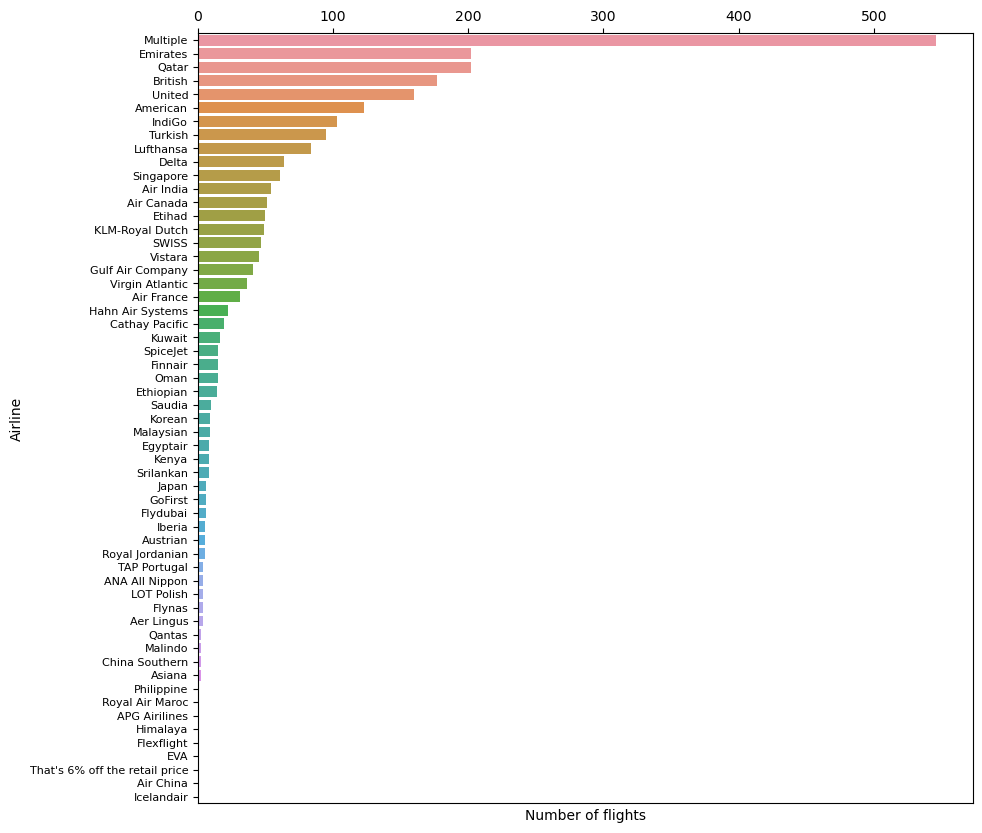

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure( figsize= (10, 10))
#flights_booked = sns.load_dataset("flight_booking")
flight_booked_plot = sns.barplot(data=flight_booking,
            y="Airline name ",
            x="Total_Flights",
            orient='h')

#labels for x & y axis
plt.xlabel('Number of flights')
plt.ylabel('Airline')

#altering fontsize for yticks
plt.yticks( fontsize = 8)

#move the x ticks to top 
flight_booked_plot.xaxis.set_ticks_position('top')
plt.show()

* Connecting flight have been the most prefered form of transport with over 540 bookings
* Emirates and Qatar came as a strong second with just over 200 bookings
* Top 10 airlines account for over 70 % of total booking giving them a powerfull pricing advantage

## How is the pricing of airlines?  

In [19]:
#Replacing all non numeric values 
flight_cleaned['Price_new'] = flight_cleaned['Price'].str.replace( '[^0-9]', '', regex=True)

#Filling all NaN with 0
flight_cleaned['Price_new'] = flight_cleaned['Price_new'].fillna('0')

#Filling 0 for cells with empty values
flight_cleaned.loc[ flight_cleaned['Price_new'].str.len() == 0 ,'Price_new'] = '0'

#converting the column to float
flight_cleaned['Price_new'] = flight_cleaned['Price_new'].astype(float)


In [20]:
#Finding average price for airlines
#flight_cleaned.columns

flight_ticket_pricing = flight_cleaned.groupby('Airline name ',as_index= False)\
.agg(Avg_ticket_cost = ('Price_new', 'mean'))\
.sort_values('Avg_ticket_cost' , ascending= False)\
.reset_index(drop = True)

flight_ticket_pricing

,Airline name,Avg_ticket_cost
0,Philippine,2556.000000
1,Virgin Atlantic,1962.305556
2,ANA All Nippon,1833.250000
3,Qatar,1735.608911
4,Korean,1610.222222
5,British,1579.519774
6,Japan,1518.333333
7,United,1488.131250
8,Multiple,1470.891941
9,Iberia,1412.200000


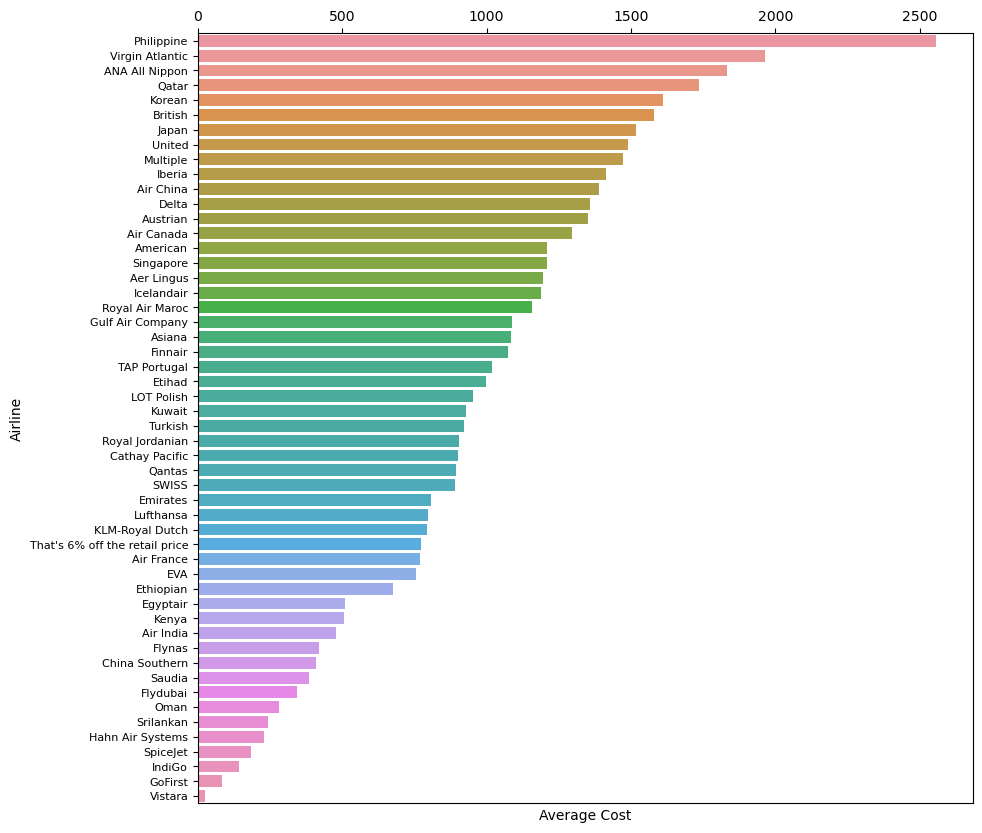

In [21]:
plt.figure( figsize= (10, 10))
#flights_booked = sns.load_dataset("flight_booking")
flight_booked_plot = sns.barplot(data=flight_ticket_pricing.query('Avg_ticket_cost > 0'),
            y="Airline name ",
            x="Avg_ticket_cost",
            orient='h')

#labels for x & y axis
plt.xlabel('Average Cost')
plt.ylabel('Airline')

#altering fontsize for yticks
plt.yticks( fontsize = 8)

#move the x ticks to top 
flight_booked_plot.xaxis.set_ticks_position('top')
plt.show()

* Phillipine is the most costliest airline carrier costing on an average above $2500
* Indian airline carriers are the most budget friendly with 4 out of 5 least expensive carriers being Indian
* Assumption that choosing multiple carriers for travel is cheap has been proven wrong with the option being part of top 10 expensive carriers.

## Airport Operations

### Most famous destination

In [22]:
#Counting no of landings
flight_landings = flight_cleaned.groupby('Airport dest', as_index= False).agg(total_flights = ('Airport dest', 'count'))

#Filtering data 
flight_landings = flight_landings.drop(flight_landings[ flight_landings['Airport dest'] == '-' ].index)

flight_landings = flight_landings.sort_values('total_flights', ascending= False)

flight_landings

,Airport dest,total_flights
1,BKK,572
7,DXB,296
2,BOM,230
10,JFK,201
15,LHR,164
8,EWR,162
11,LAS,143
3,CDG,143
16,MLE,117
13,LGA,56


In [23]:
#Getting airport code and airport name
airport_details = pd.read_csv('/kaggle/input/airport-codes/airports.csv')

#Joining the data set to get the country name , city ,airport name 
flight_airport = airport_details.merge(flight_landings, left_on='IATA',right_on='Airport dest', suffixes=['_airport', '_flight'], how= 'right')

#Selecting the columns that are necessary
flight_aiport_filtered = flight_airport[['Name', 'City', 'Country', 'Latitude', 'Longitude', 'total_flights']]

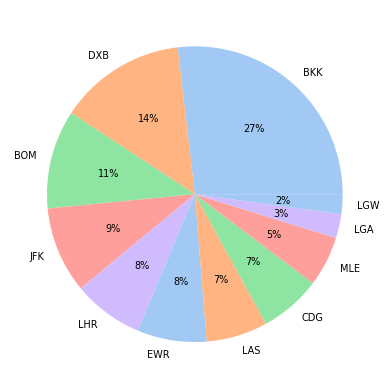

In [24]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(flight_landings.query('total_flights > 20')['total_flights'], 
        labels = flight_landings.query('total_flights > 20')['Airport dest'], 
        colors = colors, 
        autopct='%.0f%%',
       textprops={'fontsize': 7})

#plt.legend(fontsize = 3)

plt.show()

## What is the most famous tourist destination (Country)?

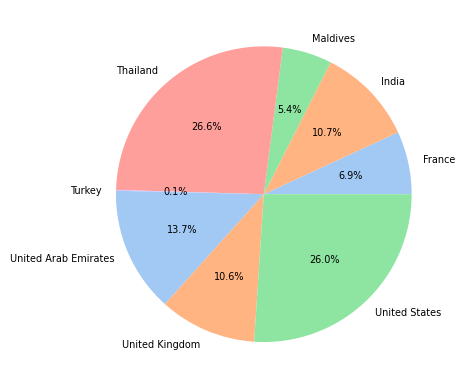

In [25]:
country_activity = flight_aiport_filtered.groupby('Country', as_index=False).agg({'total_flights':'sum'})

country_activity
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(country_activity['total_flights'], 
        labels = country_activity['Country'], 
        colors = colors, 
        autopct='%.01f%%',
       textprops={'fontsize': 7})

#plt.legend(fontsize = 3)

plt.show()


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


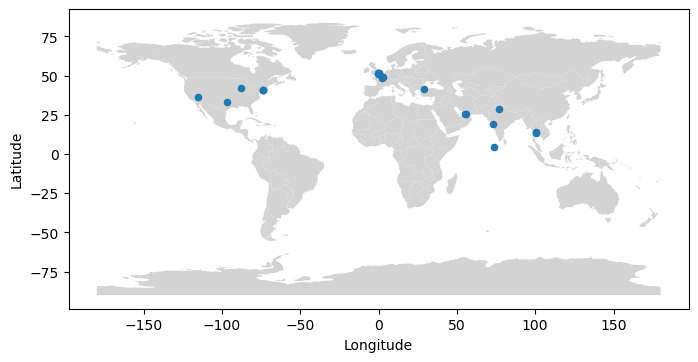

In [26]:
import geopandas as gpd

# initialize an axis
fig, ax = plt.subplots(figsize=(8,6))

# plot map on axis
countries = gpd.read_file(  
     gpd.datasets.get_path("naturalearth_lowres"))
countries.plot(color="lightgrey",ax=ax)


# plot points
flight_aiport_filtered.plot(x="Longitude", y="Latitude", kind="scatter", colormap="YlOrRd", 
        ax=ax)

plt.show()

## Airport operations - Total inbound and out bound traffic

In [27]:
# Inbound traffic  - Flights landing at the airport

